# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[round(num_test/2):], newsgroups_test.target[round(num_test/2):]
dev_data, dev_labels = newsgroups_test.data[:round(num_test/2)], newsgroups_test.target[:round(num_test/2)]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print ('training label shape:', train_labels.shape)
print ('test label shape:', test_labels.shape)
print ('dev label shape:', dev_labels.shape)
print ('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

[2 pts]

In [29]:
def P1(num_examples=5):
### STUDENT START ###

  # Check if examples is greater than 0
  if num_examples <= 0:
        exit
  
  # Print examples out 
  for i in (0, num_examples):
    print("Data: ", test_data[i],"\n", 
          "Label Code: ", test_labels[i], "\n",
          "Label: " , newsgroups_train.target_names[test_labels[i]])

    print("-------------------------------------")
### STUDENT END ###
P1(5)

Data:  
Just taking a guess, perhaps it was that Koresh had peaceably been served
with warrants before, and he did not shoot anyone but instead went with the
police without fighting.
--
"On the first day after Christmas my truelove served to me...  Leftover Turkey!
On the second day after Christmas my truelove served to me...  Turkey Casserole
    that she made from Leftover Turkey.
[days 3-4 deleted] ...  Flaming Turkey Wings! ...
   -- Pizza Hut commercial (and M*tlu/A*gic bait) 
 Label Code:  3 
 Label:  talk.religion.misc
-------------------------------------
Data:  
Rome was under attack by barbarians, they sent for advice to some Oracle,
and she said Worship Cybele and you'll be saved. They did, they were.

Cybele was the quintessential wiccan goddess, there was Her and her son &
lover, Attis. Yucky idea if you ask me. OK the book says she was Phrygian,
from the neolithic matriarchal society Catal Huyuk (Turkey). Worshipped 1st
as Black Stone (that Kaaba in Mecca ring a bell mayb

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

[6 pts]

In [5]:
def P2():
### STUDENT START ###

    # Vectorize input
    transformer = CountVectorizer()
    w = transformer.fit_transform(train_data)
    
    #a. Questions
    # What is the size of the vocabulary
    print ("Question A Set\n")
    print("size of the vocabulary is: ", w.shape[1])
    
    # What is the average number of non-zero features per example
    print("Average # of non-zero features is: ", w.nnz)
    
    # What fraction of the entries in the matrix are non-zero
    print("Fraction of entries which are non-zero: " , (w.nnz)/(w.shape[0] * w.shape[1]), "\n\n")
    
    
    #b. Questions
    # What are teh 0th and last feature strings
    print("Question B Set\n")
    print("The 0th feature string is: ", transformer.get_feature_names()[0])
    print("The nth feature string is: ", transformer.get_feature_names()[-1], "\n\n")

    #c. Questions
    print("Questions c-f\n")
    # Average number of non-zero features per example using own vocabulary
    transformer_v = CountVectorizer(vocabulary={"atheism", "graphics", "space", "religion"})
    v = transformer_v.fit_transform(train_data)
    
    print("Number of non-zero features per example with own vocabulary: ", v.nnz)
    
    # d. Use bi-gram and tri-gram. What size vocabulary?
    transformer_bi = CountVectorizer(ngram_range=(2,2))
    w2 = transformer_bi.fit_transform(train_data)
    print("Size of vocabulary using bi-gram: ", w2.shape[1])
    
    transformer_tri = CountVectorizer(ngram_range=(3,3))
    w3 = transformer_tri.fit_transform(train_data)
    print("Size of vocabulary using tri-gram: ", w3.shape[1])
    
    # e. Prune words less than 10 documents. What size vocabulary?
    transformer_10 = CountVectorizer(min_df=10)
    w10 = transformer_10.fit_transform(train_data)
    
    print("Size of vocabulary minus words less than 10 documents: ", w10.shape[1])
    
    # f. What size of words in dev data missing?
    w_dev = transformer.fit_transform(dev_data)
    missing = round((w.shape[1] - w_dev.shape[1])/w.shape[1]*100, 2)
    print("Size of words in dev data missing: ",missing, "%" )
        
    

### STUDENT END ###
P2()

Question A Set

size of the vocabulary is:  26879
Average # of non-zero features is:  196700
Fraction of entries which are non-zero:  0.0035978272269590263 


Question B Set

The 0th feature string is:  00
The nth feature string is:  zyxel 


Questions c-f

Number of non-zero features per example with own vocabulary:  546
Size of vocabulary using bi-gram:  194891
Size of vocabulary using tri-gram:  315692
Size of vocabulary minus words less than 10 documents:  3064
Size of words in dev data missing:  39.56 %


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

[4 pts]

In [14]:
def P3():
### STUDENT START ###
    # Set up values for model parameters, k, alpha and C
    k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    alphas = [.01, .1, 1]
    c_values = [.01, .1, 1, 10]

    # Vectorize data
    transformer = CountVectorizer()
    v_train_data = transformer.fit_transform(train_data)
    v_dev_data = transformer.transform(dev_data)

    print("KNN Classifier")
    # KNN Classifier -- loop through different values of k
    for i in k_values:
        knn_model = KNeighborsClassifier(n_neighbors=i)
        knn_model.fit(v_train_data, train_labels)
        knn_pred = knn_model.predict(v_dev_data)
        
        print(classification_report(dev_labels, knn_pred))
    
    print("NB Classifier")
    # NB Model -- loop through different values of alpha
    for i in alphas:
        nb_model = MultinomialNB(alpha=i)
        nb_model.fit(v_train_data, train_labels)
        nb_pred = nb_model.predict(v_dev_data)
        
        print(classification_report(dev_labels, nb_pred))
    
    print("LogisticRegression Classifier")
    # Logistic Regression Model -- loop through different values of C
    for i in c_values:
        log_model = LogisticRegression(C=i)
        m = log_model.fit(v_train_data, train_labels)
        log_pred = log_model.predict(v_dev_data)
        
        print("Value of C : ", i)
        
        # Output the value of sum of squared weights for this value of C
        print( "Sum Weights for class 0 ", np.sum(np.square(m.coef_[0])), 
               "Sum Weights for class 1 ", np.sum(np.square(m.coef_[1])),
               "Sum Weights for class 2 ", np.sum(np.square(m.coef_[2])), 
               "Sum Weights for class 3 ", np.sum(np.square(m.coef_[3])))
        
        print(classification_report(dev_labels, log_pred))
        
    
    
### STUDENT END ###
P3()

KNN Classifier
             precision    recall  f1-score   support

          0       0.40      0.35      0.37       165
          1       0.52      0.34      0.41       185
          2       0.38      0.54      0.44       199
          3       0.25      0.25      0.25       127

avg / total       0.40      0.38      0.38       676

             precision    recall  f1-score   support

          0       0.36      0.48      0.41       165
          1       0.49      0.45      0.47       185
          2       0.37      0.46      0.41       199
          3       0.33      0.10      0.16       127

avg / total       0.40      0.40      0.38       676

             precision    recall  f1-score   support

          0       0.36      0.44      0.40       165
          1       0.58      0.38      0.46       185
          2       0.41      0.56      0.47       199
          3       0.31      0.20      0.25       127

avg / total       0.43      0.41      0.41       676

             precision

ANSWER:

a. Why doesn't nearest neighbors work well for this problem?

k-nn suffers from the curse of dimensionality, euclidean distance is hampered now that we have a lot of features.
KNN doesn't know which attributes are more important and when computing distance between data points each attribute normally weighs the same to the total distance. This means that attributes which are not so important will have the same influence on the distance compared to more important attributes.

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

Logistic regression has a strong independence assumption which isn't true here. In the newsgroup posts, a word actually impacts the probability of the next word chosen (e.g. the word "The" will likely be followed by a noun). Naive based can better take advantage of the posterior probabilities.


c. Logistic regression estimates a weight vector for each class, which you can access with the coef_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

C is the inverse of regularization strength so it makes sense that higher values of C makes larger weights (less regularization). As shown in the output, with C=10, sum of squared weights per class is 500+ while at the lowest value, C=.01, sum of squared weights per class is only at 2.x.

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

[5 pts]

In [30]:
def P4():
### STUDENT START ###

    # Vectorize the text data
    transformer = CountVectorizer()
    v_train_data = transformer.fit_transform(train_data)
    v_dev_data = transformer.transform(dev_data)
    
    print("LogisticRegression Classifier")
    # Logistic Regression Model
    log_model = LogisticRegression(C=.1)
    log_model.fit(v_train_data, train_labels)
    log_pred = log_model.predict(v_dev_data)
        
    
    # Find the top 5 features with largest weights
    x_dict = {}
    for j in range(0,4):
        x_index = []
        x = sorted(abs(log_model.coef_[j]))[:5]

        for i in range(0, len(log_model.coef_[j])):
            if abs(log_model.coef_[j][i]) in x:
                x_index.append(i)
                if len(x_index) > 4:
                    break   
        x_dict[j] = x_index
    
    # Create table with weights
    print ('labels names:', newsgroups_train.target_names)
    for i in x_dict.keys():
        for j in x_dict[i]:
            if i == 0:
                print("%s %s %s %s %s" % (transformer.get_feature_names()[j], log_model.coef_[i][j], "X", "X", "X"))
            elif i == 1:
                print("%s %s %s %s %s" % (transformer.get_feature_names()[j], "X", log_model.coef_[i][j], "X", "X"))
                #print(transformer.get_feature_names()[j], "\t", "X", log_model.coef_[i][j], "X", "X")
            elif i == 2:
                print("%s %s %s %s %s" % (transformer.get_feature_names()[j], "X", "X", log_model.coef_[i][j], "X"))
                #print(transformer.get_feature_names()[j], "\t", "X", "X", log_model.coef_[i][j], "X")
            else:
                print("%s %s %s %s %s" % (transformer.get_feature_names()[j], "X", "X", "X", log_model.coef_[i][j]))
                #print(transformer.get_feature_names()[j], "\t", "X", "X", "X", log_model.coef_[i][j])

    # Create table with weights for bi-gram features
    print("\n\nBi Gram table\n")
    transformer_bi = CountVectorizer(ngram_range=(2,2))
    v_train_data = transformer_bi.fit_transform(train_data)
    v_dev_data = transformer_bi.transform(dev_data)

       # Find the top 5 features with largest weights
    x_dict = {}
    for j in range(0,4):
        x_index = []
        x = sorted(abs(log_model.coef_[j]))[:5]

        for i in range(0, len(log_model.coef_[j])):
            if abs(log_model.coef_[j][i]) in x:
                x_index.append(i)
                if len(x_index) > 4:
                    break   
        x_dict[j] = x_index
    
    # Create table with weights
    print ('labels names:', newsgroups_train.target_names)
    for i in x_dict.keys():
        for j in x_dict[i]:
            if i == 0:
                print("%s %s %s %s %s" % (transformer_bi.get_feature_names()[j], log_model.coef_[i][j], "X", "X", "X"))
            elif i == 1:
                print("%s %s %s %s %s" % (transformer_bi.get_feature_names()[j], "X", log_model.coef_[i][j], "X", "X"))
                #print(transformer.get_feature_names()[j], "\t", "X", log_model.coef_[i][j], "X", "X")
            elif i == 2:
                print("%s %s %s %s %s" % (transformer_bi.get_feature_names()[j], "X", "X", log_model.coef_[i][j], "X"))
                #print(transformer.get_feature_names()[j], "\t", "X", "X", log_model.coef_[i][j], "X")
            else:
                print("%s %s %s %s %s" % (transformer_bi.get_feature_names()[j], "X", "X", "X", log_model.coef_[i][j]))
                #print(transformer.get_feature_names()[j], "\t", "X", "X", "X", log_model.coef_[i][j])
    
    # Table (Feature, )

### STUDENT END ###
P4()

LogisticRegression Classifier
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
1200x900 -2.20291417268e-09 X X X
corruptimg -2.20291417268e-09 X X X
finishes -2.20291417268e-09 X X X
realizes -2.20291417268e-09 X X X
recopy -2.20291417268e-09 X X X
apagchw X -1.34169157016e-09 X X
censured X 1.61421007544e-09 X X
chagrin X 1.61421007544e-09 X X
christia X 1.61421007544e-09 X X
cleansed X 1.61421007544e-09 X X
452 X X -7.9838947895e-11 X
builds X X -7.9838947895e-11 X
closeup X X -9.6218617978e-12 X
faq1 X X 5.94827806645e-11 X
forensic X X -1.48153050146e-11 X
0100 X X X 1.03187149012e-08
020 X X X 1.03187149012e-08
881 X X X 1.03187149012e-08
achses X X X 1.03187149012e-08
binhex X X X 1.03187149012e-08


Bi Gram table

labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
04 21 -2.20291417268e-09 X X X
_applicability_ of -2.20291417268e-09 X X X
agencies such -2.20291417268e-09 X X X
are internal -2.20291417268e-09 X X X
ar

ANSWER: The bi gram table appears to have features that are more intuitive for that class like "are myths" [alt.atheism], "640x480x16 vga" [com.graphics]. There are numbers which appear to be arbitrary (eg. 0100, 881) which have large weights.

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

[4 pts]

In [60]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
### STUDENT START ###

    # Lowercase the string
    t = s.lower()
    # Replace larger numbers with set string
    u = re.sub('(\d){3,}',' <NUM> ', t)
    # Remove stop words
    w = re.sub('was | for | be | as | at | and | are | the | she | he | is | in | to | from | an | it | on | by | if | you | be | were | a | they| them | your | I ', ' ', t)
    # Remove punctuations
    x = re.sub('[\.\?\)\(\)\,\!\$\*\%]', ' ', w)

    return w        
### STUDENT END ###

def P5():
### STUDENT START ###
    # Choose which preprocessor to use
    use_preprocessor = better_preprocessor

    # Vectorize using the preprocessor
    transformer = CountVectorizer(preprocessor=use_preprocessor)
    v_train_data = transformer.fit_transform(train_data)
    v_dev_data = transformer.transform(dev_data)
    
    print("LogisticRegression Classifier")
    # Logistic Regression Model
    log_model = LogisticRegression(C=.1)
    log_model.fit(v_train_data, train_labels)
    log_pred = log_model.predict(v_dev_data)
                            
    print(classification_report(dev_labels, log_pred))

    
### STUDENT END ###
P5()

LogisticRegression Classifier
             precision    recall  f1-score   support

          0       0.64      0.58      0.61       165
          1       0.79      0.88      0.83       185
          2       0.74      0.81      0.77       199
          3       0.63      0.51      0.57       127

avg / total       0.71      0.72      0.71       676



(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

[4 pts]

L1 Weights > 0:  860
L2 Weights > 0:  45166
Classification Report L2
              precision    recall  f1-score   support

          0       0.62      0.56      0.59       165
          1       0.74      0.88      0.81       185
          2       0.77      0.76      0.77       199
          3       0.59      0.53      0.56       127

avg / total       0.69      0.70      0.69       676

Number of features with non-zero weight 655 

Classification Report L2 w/ trimmed vocabulary
              precision    recall  f1-score   support

          0       0.62      0.50      0.56       165
          1       0.82      0.84      0.83       185
          2       0.79      0.67      0.73       199
          3       0.40      0.58      0.48       127

avg / total       0.68      0.66      0.67       676



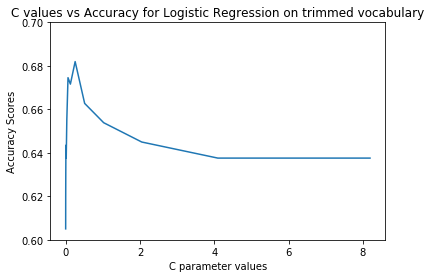

In [31]:
def unique(list1):
    x = np.array(list1)
    print(np.unique(x))

def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###

    transformer = CountVectorizer()
    v_train_data = transformer.fit_transform(train_data)
    v_dev_data = transformer.transform(dev_data)
    
    # Train logistic regression model using L1 
    log_model = LogisticRegression(penalty="l1")
    l1 = log_model.fit(v_train_data, train_labels)
    log_pred_l1 = log_model.predict(v_dev_data)
    
    # Train logistic regression model using L2
    log_model = LogisticRegression(penalty="l2")
    l2 = log_model.fit(v_train_data, train_labels)
    log_pred_l2 = log_model.predict(v_dev_data)
    
    # Output # of learned weights not zero
    # Compare learned weights not zero between L1 and L2

    print("L1 Weights > 0: " , len(l1.coef_[l1.coef_ > 0]))
    print("L2 Weights > 0: ", len(l2.coef_[l2.coef_ > 0]))

    print("Classification Report L2\n", classification_report(dev_labels, log_pred_l2))
     
    # Reduce size of vocabulary by keeping only features w/ at least one non-zero weight
    # loop through training data
    
    list_features = []
    for i in range(0, v_train_data.shape[1]):
        for j in range(0, 3):
            if l1.coef_[j][i] > 0:
                list_features.append(i)
    list_features = sorted(list_features)
    print("Number of features with non-zero weight", len(list_features), "\n")
    
    # Gets the words/features that will be retained
    words = []
    w = transformer.get_feature_names()
    for i in list_features:
        new_word = w[i]
        if new_word not in words:
            words.append(new_word)
    
    # Vectorizes the count with smaller vocabulary
    transformer2 = CountVectorizer(vocabulary = words)
    v_train_data = transformer2.fit_transform(train_data)
    v_dev_data = transformer2.fit_transform(dev_data)
    
    # Train a model
    log_model = LogisticRegression(penalty="l2", C=1)
    log_model.fit(v_train_data, train_labels)
    log_pred = log_model.predict(v_dev_data)
    
    print("Classification Report L2 w/ trimmed vocabulary\n", classification_report(dev_labels, log_pred))

    # Make plot 
    # Set up the initial value of C
    C_value = .001
    
    # Create the lists that will store c_values used and accuracy scores
    c_values_list = []
    accuracy_scores_list = []
    
    # Loop through and use different values of C, get the accuracy score
    while (C_value < 10):
        c_values_list.append(C_value)
        log_model = LogisticRegression(C=C_value, tol=.01)
        log_model.fit(v_train_data, train_labels)
        log_pred = log_model.predict(v_dev_data)
        
        accuracy_scores_list.append(metrics.accuracy_score(dev_labels, log_pred))
        
        C_value = C_value * 2;
    
    # Plot C vs Accuracy score generated above
    plt.ylim(.60, .7)
    plt.plot(c_values_list, accuracy_scores_list)
    plt.title("C values vs Accuracy for Logistic Regression on trimmed vocabulary")
    plt.ylabel("Accuracy Scores")
    plt.xlabel("C parameter values")
    plt.figure(figsize=(100,100))
    

    ### STUDENT END ###
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

[4 pts]

In [4]:
def P7():
    ### STUDENT START ###
    
    #Vectorize using Tfidf
    transformer = TfidfVectorizer()
    v_train_data = transformer.fit_transform(train_data)
    v_dev_data = transformer.transform(dev_data)
    
    # Train model with C=100
    log_model = LogisticRegression(C=100)
    w = log_model.fit(v_train_data, train_labels)
    log_pred = log_model.predict(v_dev_data)
    
    # Find top 3 documents where R is largest (max predicted p/ predicted p of correct label)
    # Get prediction probabilities
    p = w.predict_proba(v_dev_data)
    
    # Get maximum predicted p
    max_p = np.max(p)
    top_l = {}
    
    # Get max R for each
    for i in range(0, p.shape[0]):
        x = np.max([p[i][0], p[i][1], p[i][2], p[i][3]])
        r = max_p/x
        top_l[r] = i
    # Get top documents
    l = sorted(list(top_l.keys()), reverse=True)[:3]
    print ("Top 3 documents \n")
    for j in l:
        print("Index: %s R-value: %s" % (top_l[j], j))
        
    num_errors = 0

    # Find some examples of a mistake that model is making
    print("\n\nExamples of incorrect prediction\n")

    for i in range(0, log_pred.shape[0]):
        if log_pred[i] != dev_labels[i]:
            print("Predicted label: ", newsgroups_train.target_names[log_pred[i]])
            print("Expected label: ", newsgroups_train.target_names[dev_labels[i]])
            print("Dev data: ", dev_data[i])
            if num_errors > 5:
                break
            else:
                num_errors =+ 1

    ### STUDENT END ###
P7()

Top 3 documents 

Index: 592 R-value: 3.82534114567
Index: 653 R-value: 3.52127321185
Index: 461 R-value: 3.46287548753


Examples of incorrect prediction

Predicted label:  comp.graphics
Expected label:  sci.space
Dev data:  


Or how about:
    "End light pollution now!!"

Your banner would have no effect on its subject, but my banner would.

Predicted label:  talk.religion.misc
Expected label:  alt.atheism
Dev data:  



Sure, a person could have great respect for Jesus and yet be an 
atheist.  (Having great respect for Jesus does not necessarily mean 
that one has to follow the Christian [or Muslim] interpretation of 
his life.) 
Predicted label:  comp.graphics
Expected label:  alt.atheism
Dev data:   

Predicted label:  sci.space
Expected label:  talk.religion.misc
Dev data:  [ deleted ]
[ deleted ]

  Your information on this topic is very much out of date.  Quantum Electro-
dynamics (QED - which considers light to be particles) has been experimentally
verified to about 14 decima

Predicted label:  comp.graphics
Expected label:  alt.atheism
Dev data:  This is hell.  Hasn't anyone noticed?

Predicted label:  sci.space
Expected label:  alt.atheism
Dev data:  
Yes, unless the observer is at rest with respect to the singularity at
infinite distance away. But an observer on a close approach to the BH will
see the particle go in in finite time.

Peter
Predicted label:  comp.graphics
Expected label:  sci.space
Dev data:  
Nowadays, usually with a computer. No theory predicted the numeric 
discoveries listed above. No one can yet write an algorithm that will
predict the precise behavior of any of these at any precise level of
their evolution. So it remains for experimenters to gather data on their
behavior.

Gary
Predicted label:  alt.atheism
Expected label:  talk.religion.misc
Dev data:  
I think you have are addressing the wrong issue. The situation
is more like: we both see some elves. This is established as
fact since we can both touch them etc. Then one of us says,

ANSWER:

A couple of mistakes I've observed is when the model sees a specific word that is associated with a certain class and assumes that class without looking at the more general context (ie. the whole paragraph or post). For example, a post may contain "Jesus" and "Christian" and this would pull this to be classified as "talk.religion.misc", even though these words may be used in the context of an argument against organized religion and should be classified as "alt.atheism".

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

- [1 pt] for a reasonable attempt
- [2 pts] for improved performance